<a href="https://colab.research.google.com/github/serinss/seSAC_ML_DL_Class/blob/main/02_1_%ED%9B%88%EB%A0%A8_%EC%84%B8%ED%8A%B8%EC%99%80_%ED%85%8C%EC%8A%A4%ED%8A%B8_%EC%84%B8%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%run my_init.py

Mounted at /content/drive


In [3]:
%matplotlib inline

#데이터 준비하기

In [4]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = [[l,w] for l,w in zip(length, weight)]

fish_target = [1]*35 + [0]*14

In [11]:
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

#훈련하기

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

KNeighborsClassifier()

#평가하기

In [17]:
#kn.score(test_input, test_target) #0.0
accuracy_score(test_target, kn.predict(test_input)) #0.0

# 정확도가 0.0인 이유? -> sampling bias
# [0~34 : all 도미][35~48 : all 빙어] --> 도미로만 훈련하고 빙어로만 테스트하니 0%
# 적절하게 데이터들을 섞어서 테스트해야 함

# ==> numpy 로 섞어보자

0.0

#numpy 연습

In [24]:
np.random.seed(42) #난수(random number) 생성기 초기화, 난수 생성기는 난수 생성하도록 (시드 값)으로 시작할 숫자가 필요. -> 없으면 현재시각
X = np.random.randint(1, 100, 15).reshape(3, -1) # reshape - 3행, 열은 알아서 맞게 생성
X

array([[52, 93, 15, 72, 61],
       [21, 83, 87, 75, 75],
       [88, 24,  3, 22, 53]])

In [23]:
X.shape

(3, 5)

#sum

In [25]:
X.sum() #전체 합

824

axis=0 , x축  
axis=1 , y축  
axis=2 , z축  
-> axis를 가지고 합을 구하는 방식을 잘 알고 있어야 함

axis=None은 기본값으로 모든 요소의 값을 합산하여 1개의 스칼라값을 반환합니다.  
axis=0은 x축을 기준으로 여러 row를 한 개로 합치는 과정입니다.  
axis=1은 y축을 기준으로 row 별로 존재하는 column들의 값을 합쳐 1개로 축소하는 과정입니다.  
axis=2는 z축을 기준으로 column의 depth가 가진 값을 축소하는 과정입니다.  


3차원 배열로 만들어진 Tensor의 경우 axis=2를 계산할 때 column은 스칼라값(Depth가 스칼라로 계산됨)이 됩니다. 4차원 이상의 배열로 확장될 경우 이와 같은 방식으로 개념을 적용하고 확장할 수 있습니다.

In [26]:
X.sum(axis=0) #모든 열들의 합, 샘플들의 특성의 합(세로합, 특성(컬럼별)의 합)

array([161, 200, 105, 169, 189])

In [27]:
X.sum(axis=1) #모든 행들의 합, 샘플의 합(가로합)

array([293, 341, 190])

#shuffle(샘플링 편향 해결하기)
하기전에  
- range(49) -> generator  
- np.arange(49( -> ndarray(n차원 배열 객체)

In [32]:
np.random.seed(49)
index = np.arange(49)
np.random.shuffle(index) #index를 섞어서 해당하는 데이터 값도 섞을 수 있을 것
print(index)

[14 27 24 16 17 41  0 19 31  2 21 10 30 22 38 23 11 34 20  1 13  7 43 25
 46  4  9 29  3  8 39 28 15 37 33  6 26 35 48 32 47 36 18 44  5 12 40 45
 42]


In [36]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

print(input_arr[14], train_input[0]) #섞인대로 나오는지 확인

[ 32. 600.] [ 32. 600.]


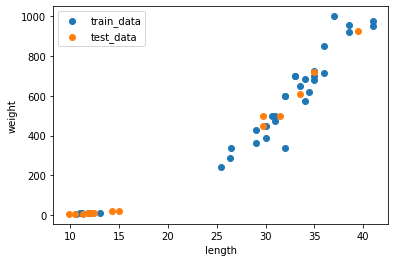

In [44]:
%matplotlib inline #show 명령 없이도 바로 그래프 표현 (정적)
#%matplotlib notebook #show 명령 없이도 바로 그래프 표현 (동적)

plt.scatter(train_input[:,0], train_input[:,1]) # 0: length, 1: weight
plt.scatter(test_input[:,0], test_input[:,1]) # 0: length, 1: weight
plt.xlabel('length')
plt.ylabel('weight')
plt.legend(['train_data', 'test_data'])
plt.show()
#섞여 있는 모습 확인 가능!

In [38]:
#섞인 데이터로 머신 러닝 테스트

kn = kn.fit(train_input, train_target)
accuracy_score(test_target, kn.predict(test_input))

1.0